## Simple Neural Network

It is a simple classfication problem using HR Data.   It's an attrition prediction. The target variable is 'left'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
## Reading the data
df = pd.read_csv("/content/hr_data.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
## Checking the missing values
df.isnull().sum()

## There are no missing values

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [ ]:
## Checking the target variable
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Neural networks will accept only numerical data.  Hence we will convert all categorical data into a numerical data using get_dummeis function

In [ ]:
feats = ['department','salary']
df_final = pd.get_dummies(df,columns=feats,drop_first=True)

In [ ]:
df_final.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
## Creating Independent and dependent variables
X = df_final.drop(['left'],axis=1).values
y = df_final['left'].values

In [ ]:
## Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)

In [ ]:
## Scalling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train.shape, X_test.shape

((11249, 18), (3750, 18))

### Let us build an ML model

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred)*100,2), '%')

Accuracy Score:  78.85 %


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2839
           1       0.61      0.35      0.45       911

    accuracy                           0.79      3750
   macro avg       0.72      0.64      0.66      3750
weighted avg       0.77      0.79      0.77      3750



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[2638  201]
 [ 592  319]]


### Building the Neural Network

In [ ]:
## Let us import the required libraries
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
classifier = Sequential()  ## Instantiate the model

In [ ]:
X_train.shape

(11249, 18)

In [ ]:
## Adding the layers.
classifier.add(Dense(18, kernel_initializer = "uniform",activation = "relu", input_dim=18))  ## Input Layer
classifier.add(Dense(9, kernel_initializer = 'uniform', activation = 'relu'))  ## this is Hidden Layer ie 1 and number of nodes is 9

In [ ]:
classifier.add(Dense(1, kernel_initializer = "uniform",activation = "sigmoid"))  ## Output Layer

In [ ]:
classifier.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                342       
                                                                 
 dense_1 (Dense)             (None, 9)                 171       
                                                                 
 dense_2 (Dense)             (None, 1)                 10        
                                                                 
Total params: 523
Trainable params: 523
Non-trainable params: 0
_________________________________________________________________


In [ ]:
classifier.fit(X_train, y_train, batch_size = 32, epochs = 50)

Epoch 1/50
352/352 [==============================] - 2s 2ms/step - loss: 0.4749 - accuracy: 0.7636
Epoch 2/50
352/352 [==============================] - 1s 2ms/step - loss: 0.3196 - accuracy: 0.8246
Epoch 3/50
352/352 [==============================] - 1s 3ms/step - loss: 0.2813 - accuracy: 0.9084
Epoch 4/50
352/352 [==============================] - 1s 2ms/step - loss: 0.2591 - accuracy: 0.9264
Epoch 5/50
352/352 [==============================] - 1s 2ms/step - loss: 0.2227 - accuracy: 0.9363
Epoch 6/50
352/352 [==============================] - 1s 2ms/step - loss: 0.1989 - accuracy: 0.9389
Epoch 7/50
352/352 [==============================] - 1s 2ms/step - loss: 0.1869 - accuracy: 0.9435
Epoch 8/50
352/352 [==============================] - 1s 2ms/step - loss: 0.1790 - accuracy: 0.9455
Epoch 9/50
352/352 [==============================] - 1s 2ms/step - loss: 0.1744 - accuracy: 0.9489
Epoch 10/50
352/352 [==============================] - 1s 2ms/step - loss: 0.1706 - accuracy: 0.9511

In [ ]:
y_pred = classifier.predict(X_test)

118/118 [==============================] - 0s 1ms/step


In [ ]:
y_pred[:10]

array([[9.9452150e-01],
       [6.0957735e-03],
       [9.2307669e-01],
       [9.9065131e-01],
       [2.2380702e-02],
       [1.7193137e-02],
       [8.5896961e-03],
       [6.1756838e-04],
       [4.7616951e-02],
       [2.5015194e-03]], dtype=float32)

In [ ]:
y_pred = np.round(y_pred)

In [ ]:
y_pred[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
cm


array([[2788,  120],
       [  83,  759]])

In [ ]:
## Classification Report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2908
           1       0.86      0.90      0.88       842

    accuracy                           0.95      3750
   macro avg       0.92      0.93      0.92      3750
weighted avg       0.95      0.95      0.95      3750



## Using validation_split

In [ ]:
#training data is splitting in 80 and 20%
classifier.fit(X_train, y_train, batch_size = 16, epochs = 50, validation_split=0.2)

Epoch 1/50
563/563 [==============================] - 2s 3ms/step - loss: 0.1927 - accuracy: 0.9435 - val_loss: 0.1918 - val_accuracy: 0.9404
Epoch 2/50
563/563 [==============================] - 2s 3ms/step - loss: 0.1920 - accuracy: 0.9440 - val_loss: 0.1941 - val_accuracy: 0.9387
Epoch 3/50
563/563 [==============================] - 1s 3ms/step - loss: 0.1911 - accuracy: 0.9441 - val_loss: 0.1948 - val_accuracy: 0.9369
Epoch 4/50
563/563 [==============================] - 1s 2ms/step - loss: 0.1908 - accuracy: 0.9448 - val_loss: 0.1935 - val_accuracy: 0.9418
Epoch 5/50
563/563 [==============================] - 1s 2ms/step - loss: 0.1905 - accuracy: 0.9443 - val_loss: 0.1935 - val_accuracy: 0.9418
Epoch 6/50
563/563 [==============================] - 1s 2ms/step - loss: 0.1901 - accuracy: 0.9448 - val_loss: 0.1941 - val_accuracy: 0.9422
Epoch 7/50
563/563 [==============================] - 1s 2ms/step - loss: 0.1902 - accuracy: 0.9448 - val_loss: 0.1959 - val_accuracy: 0.9373
Epoch 

In [ ]:
classifier.evaluate(X_test, y_test)

118/118 [==============================] - 0s 461us/step - loss: 0.1201 - accuracy: 0.9653


[0.12013793736696243, 0.9653333425521851]

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
## Classification Report
print(classification_report(y_test, y_pred))

118/118 [==============================] - 0s 1ms/step
[[2808  100]
 [  84  758]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2908
           1       0.88      0.90      0.89       842

    accuracy                           0.95      3750
   macro avg       0.93      0.93      0.93      3750
weighted avg       0.95      0.95      0.95      3750



## Using callbacks

In [ ]:
## function to plot the history of callbacks.
def plot_loss(loss,val_loss):
  plt.figure(figsize=(15,8))
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()


In [ ]:
h_callback = classifier.fit(X_train, y_train, batch_size = 16, epochs = 100, validation_data=(X_test, y_test))

Epoch 1/100
704/704 [==============================] - 2s 3ms/step - loss: 0.0766 - accuracy: 0.9747 - val_loss: 0.1526 - val_accuracy: 0.9603
Epoch 2/100
704/704 [==============================] - 2s 2ms/step - loss: 0.0767 - accuracy: 0.9745 - val_loss: 0.1578 - val_accuracy: 0.9616
Epoch 3/100
704/704 [==============================] - 2s 3ms/step - loss: 0.0762 - accuracy: 0.9748 - val_loss: 0.1500 - val_accuracy: 0.9624
Epoch 4/100
704/704 [==============================] - 2s 3ms/step - loss: 0.0779 - accuracy: 0.9742 - val_loss: 0.1511 - val_accuracy: 0.9613
Epoch 5/100
704/704 [==============================] - 2s 3ms/step - loss: 0.0773 - accuracy: 0.9749 - val_loss: 0.1536 - val_accuracy: 0.9605
Epoch 6/100
704/704 [==============================] - 2s 3ms/step - loss: 0.0767 - accuracy: 0.9747 - val_loss: 0.1532 - val_accuracy: 0.9605
Epoch 7/100
704/704 [==============================] - 2s 3ms/step - loss: 0.0760 - accuracy: 0.9752 - val_loss: 0.1524 - val_accuracy: 0.9605

In [ ]:
type(h_callback)

keras.callbacks.History

In [ ]:
h_callback.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

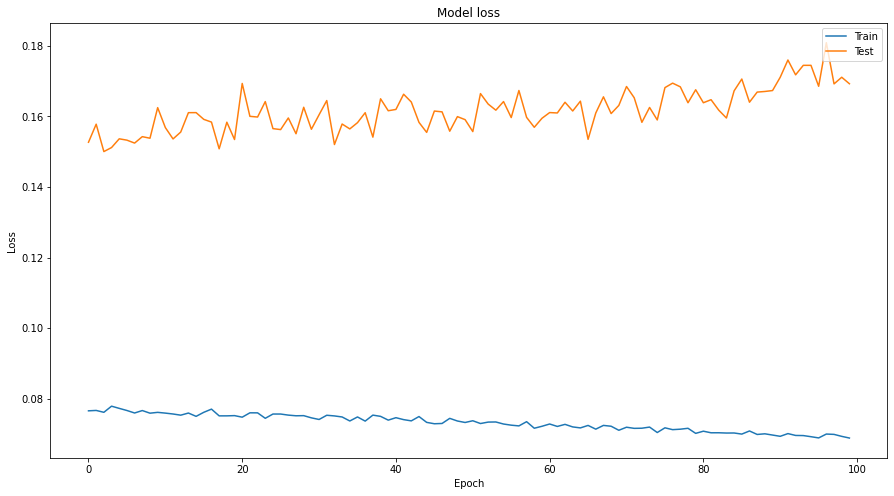

In [ ]:
import  matplotlib.pyplot as plt
# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])


In [ ]:
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
## Classification Report
print(classification_report(y_test, y_pred))

118/118 [==============================] - 0s 1ms/step
[[2785   54]
 [  92  819]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2839
           1       0.94      0.90      0.92       911

    accuracy                           0.96      3750
   macro avg       0.95      0.94      0.95      3750
weighted avg       0.96      0.96      0.96      3750



### Early Stopping Callback

In [ ]:
## Importing the EarlyStopping call back function
from keras.callbacks import EarlyStopping

In [ ]:
earlystopping = EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
h_callback = classifier.fit(X_train, y_train, batch_size = 16, epochs = 100, validation_data=(X_test, y_test), callbacks=[earlystopping])

Epoch 1/100
704/704 [==============================] - 2s 3ms/step - loss: 0.0687 - accuracy: 0.9771 - val_loss: 0.1733 - val_accuracy: 0.9613
Epoch 2/100
704/704 [==============================] - 2s 3ms/step - loss: 0.0692 - accuracy: 0.9761 - val_loss: 0.1783 - val_accuracy: 0.9603
Epoch 3/100
704/704 [==============================] - 2s 3ms/step - loss: 0.0695 - accuracy: 0.9764 - val_loss: 0.1777 - val_accuracy: 0.9597
Epoch 4/100
704/704 [==============================] - 2s 2ms/step - loss: 0.0680 - accuracy: 0.9772 - val_loss: 0.1674 - val_accuracy: 0.9616
Epoch 5/100
704/704 [==============================] - 2s 3ms/step - loss: 0.0678 - accuracy: 0.9777 - val_loss: 0.1676 - val_accuracy: 0.9621
Epoch 6/100
704/704 [==============================] - 2s 3ms/step - loss: 0.0680 - accuracy: 0.9772 - val_loss: 0.1699 - val_accuracy: 0.9603
Epoch 7/100
704/704 [==============================] - 2s 3ms/step - loss: 0.0683 - accuracy: 0.9771 - val_loss: 0.1707 - val_accuracy: 0.9600

In [ ]:
classifier.evaluate(X_test, y_test)

118/118 [==============================] - 0s 2ms/step - loss: 0.1755 - accuracy: 0.9613


[0.1754734218120575, 0.9613333344459534]

In [ ]:
y_pred = classifier.predict(X_test)

118/118 [==============================] - 0s 3ms/step


In [ ]:
y_pred = np.round(y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2860
           1       0.94      0.92      0.93       890

    accuracy                           0.97      3750
   macro avg       0.96      0.95      0.95      3750
weighted avg       0.97      0.97      0.97      3750



In [ ]:
confusion_matrix(y_pred, y_test)

array([[2810,   72],
       [  50,  818]], dtype=int64)

Droping nodes in layer

# it will be helpful to remove unwanted features when you have large number of features and or adding large number of nodes

its nothing but features elimation technique

In [ ]:
## Importing the dropuot 
from keras.layers import Dropout

In [ ]:
model = Sequential()
model.add(Dropout(0,2,input_shape = (18,)))
model.add(Dense(18,kernel_initializer='uniform',activation='relu'))
model.add(Dense(9,kernel_initializer='uniform',activation='relu'))
model.add(Dense(1,kernel_initializer='uniform',activation="sigmoid"))  # output layer

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [ ]:
model.fit(X_train,y_train,batch_size=32,epochs=50,validation_split=0.2)

Epoch 1/50


TypeError: ignored

In [ ]:
model.evaluate(X_test,y_test)

118/118 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.3152


[0.6932762265205383, 0.31520000100135803]

In [ ]:
y_pred = np.round(model.predict(X_test))

118/118 [==============================] - 0s 2ms/step


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.15      0.25      2839
           1       0.24      0.82      0.37       911

    accuracy                           0.32      3750
   macro avg       0.48      0.49      0.31      3750
weighted avg       0.61      0.32      0.28      3750

